# Task 3: Heart Disease Prediction

We use HDP dataset to learn, loading json to python, exploring it and finally plotting it.

## To download kaggle dataset

I am downloading the `Heart Disease Prediction` from kaggle.com, to use opendatasets with kaggle, we need to first download the kaggle.json file which have credentials of kaggle from kaggle.com. The process of downloading kaggle.json changes time by time, if you go to settings on kaggle there is an option to generate token and it will automatically download kaggle.json file.
1: Upload that kaggle.json file into google drive, and use below code to copy that file from google drive to notebook os environment.
`NOTE: please keep that kaggle.json file secret and don't share with anyone, cause whoever have access to that file can do serious things with your kaggle account`

## Copying kaggle.json file from Google drive to notebook os

1: Installs google.colab library and mounts Google Drive  
2: creates a .kaggle hidden folder on OS home directory  
3: copy kaggle.json from Google Drive to that .kaggle hidden folder  
4: give linux file permission to .kaggle/kaggle.json to be readable by notebook and python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/.secrets/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


# Use the Kaggle CLI to download the dataset

In [2]:
!kaggle datasets download -d navjotkaushal/heart-disease-uci-dataset
!unzip heart-disease-uci-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/navjotkaushal/heart-disease-uci-dataset
License(s): CC0-1.0
  0% 0.00/9.39k [00:00<?, ?B/s]
100% 9.39k/9.39k [00:00<00:00, 40.9MB/s]
Archive:  heart-disease-uci-dataset.zip
  inflating: cleanned.csv            


The dataset is downloaded and is in file system or google drive if are running the notebook on Google colab. Now trying to load it to pandas. This library is already available on google colab if you are running this notebook on a system where pandas is not installed, please use pip install pandas to install the library first then run below cells

In [81]:
import pandas as pd

hdp = pd.read_csv('/content/cleanned.csv')

# Exploratory data analysis

In [82]:
hdp.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,typical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


Machine learning is happy with numeric data, but in above dataset most of values are string like `sex`, `cp`, `fbs`, .... so we will change it from string to numbers.

In [83]:
hdp['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [84]:
gender_map = {'Male': 0, 'Female': 1}
hdp['sex'] = hdp['sex'].map(gender_map)
reverse_gender_map = {v: k for k, v in gender_map.items()}
# hdp['sex'] = hdp['sex'].map({v: k for k, v in gender_map.items()})

In [85]:
hdp['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal'], dtype=object)

In [86]:
cp_map = {'typical angina': 0, 'asymptomatic': 1, 'non-anginal': 2}
reverse_cp_map = {v: k for k, v in cp_map.items()}
hdp['cp'] = hdp['cp'].map(cp_map)
# hdp['cp'] = hdp['cp'].map({v: k for k, v in cp_map.items()})

In [87]:
hdp['fbs'].unique()

array([ True, False])

In [88]:
fbs_map = {True: 0, False: 1}
hdp['fbs'] = hdp['fbs'].map(fbs_map)
# hdp['fbs'] = hdp['fbs'].map({v: k for k, v in fbs_map.items()})

In [89]:
hdp['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [90]:
restecg_map = {'lv hypertrophy': 0, 'normal': 1, 'st-t abnormality': 2}
hdp['restecg'] = hdp['restecg'].map(restecg_map)
# hdp['restecg'] = hdp['restecg'].map({v: k for k, v in restecg_map.items()})

In [91]:
hdp['exang'].unique()

array([False,  True])

In [92]:
exang_map = {True: 0, False: 1}
hdp['exang'] = hdp['exang'].map(exang_map)
# hdp['exang'] = hdp['exang'].map({v: k for k, v in exang_map.items()})

In [93]:
hdp.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,0,0,145.0,233.0,0,0,150.0,1,2.3,0
1,67,0,1,160.0,286.0,1,0,108.0,0,1.5,2
2,67,0,1,120.0,229.0,1,0,129.0,0,2.6,1
3,37,0,2,130.0,250.0,1,1,187.0,1,3.5,0
4,41,1,0,130.0,204.0,1,0,172.0,1,1.4,0


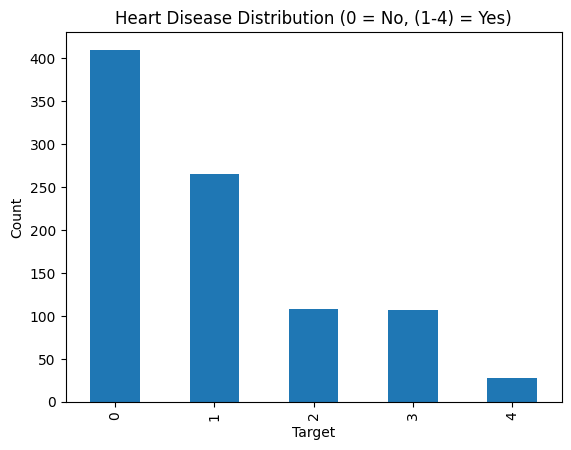

In [94]:
import matplotlib.pyplot as plt

hdp['num'].value_counts().plot(kind='bar')
plt.title("Heart Disease Distribution (0 = No, (1-4) = Yes)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

above graph shows that people with severity level 1 are the most who have heart disease

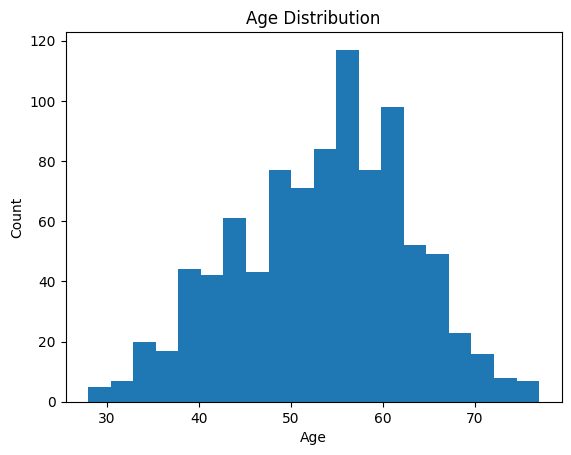

In [95]:
plt.hist(hdp['age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

above graph shows that age around 55 and 62 are most vulnerable to age disease

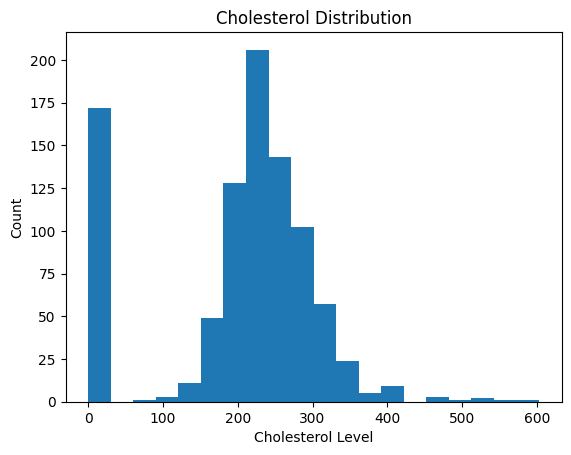

In [96]:
plt.hist(hdp['chol'], bins=20)
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol Level")
plt.ylabel("Count")
plt.show()

above graph shows that cholestrol level around 200 is the highest risk for heart disease, but it also shows that around zero there is risk of heart disease. this part is outliers, cause it is not possible for someone to have zero cholestrol. so this part need to be removed.

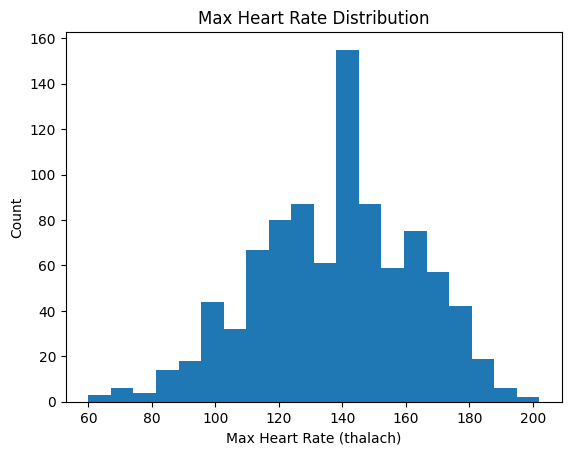

In [97]:
plt.hist(hdp['thalch'], bins=20)
plt.title("Max Heart Rate Distribution")
plt.xlabel("Max Heart Rate (thalach)")
plt.ylabel("Count")
plt.show()

## two features graph with outcomes

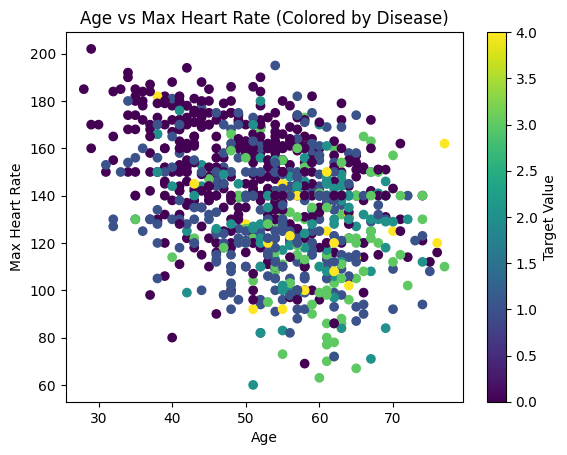

In [98]:
plt.scatter(hdp['age'], hdp['thalch'], c=hdp['num'])
plt.title("Age vs Max Heart Rate (Colored by Disease)")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.colorbar(label='Target Value')
plt.show()

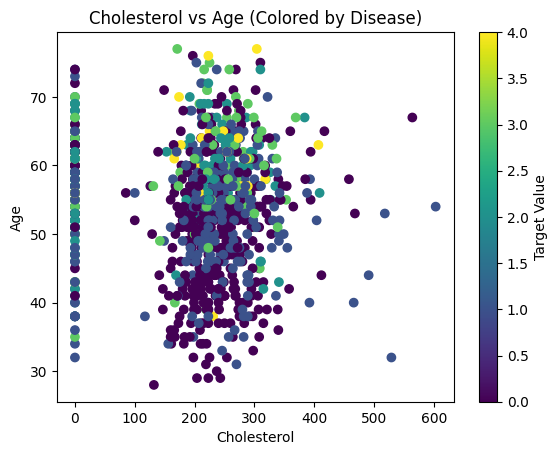

In [99]:
plt.scatter(hdp['chol'], hdp['age'], c=hdp['num'])
plt.title("Cholesterol vs Age (Colored by Disease)")
plt.xlabel("Cholesterol")
plt.ylabel("Age")
plt.colorbar(label='Target Value')
plt.show()

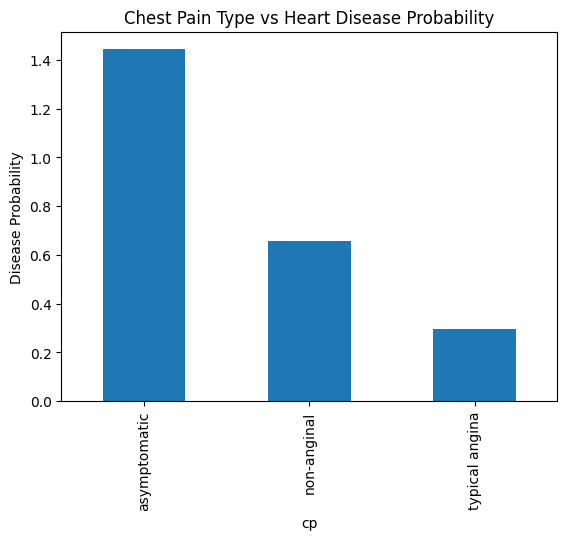

In [100]:
hdp.groupby(hdp['cp'].map(reverse_cp_map))['num'].mean().plot(kind='bar')
plt.title("Chest Pain Type vs Heart Disease Probability")
plt.ylabel("Disease Probability")
plt.show()

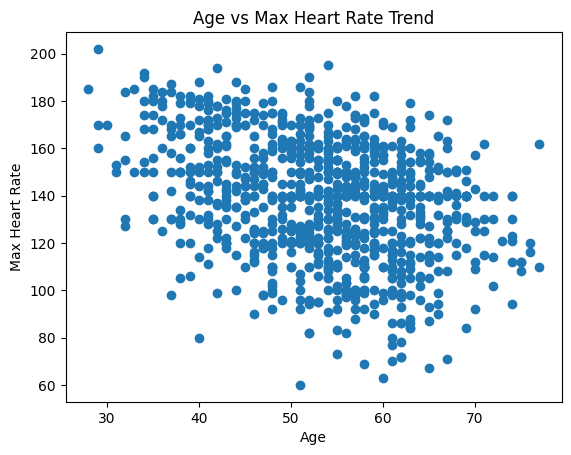

In [101]:
plt.scatter(hdp['age'], hdp['thalch'])
plt.title("Age vs Max Heart Rate Trend")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.show()

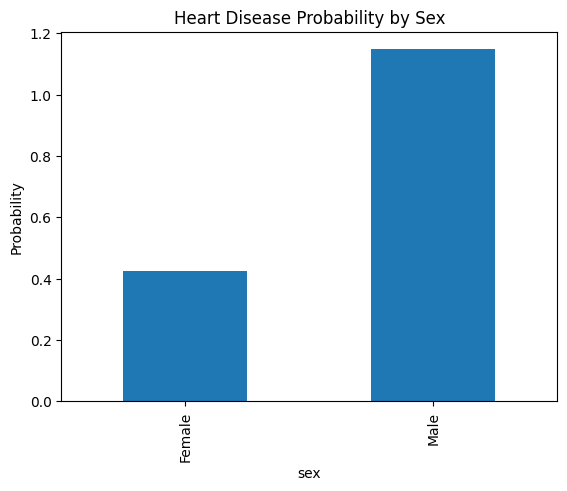

In [102]:
hdp.groupby(hdp['sex'].map(reverse_gender_map))['num'].mean().plot(kind='bar')
plt.title("Heart Disease Probability by Sex")
plt.ylabel("Probability")
plt.show()

from above charts we found the relations of features with outcomes, also the relation of two features together with outcome.
so we found below relations
1: most male are vulnerable to heart disease
2: people with higher heart rate and max age
3: cholestrol around 200-300
4: age around 50-63
5: and severity 1 was the highest

as we try to plot more features we will see more relations between them.

## removing outliers

First we should find the outliers, from above charts we got that cholestrol level and thalch. so we plot boxplots for it to detect the outliers.
if we want to find multivariable outliers then the scatter plot is a good option.
so below let's plot boxplots for both cholestrol and thalch

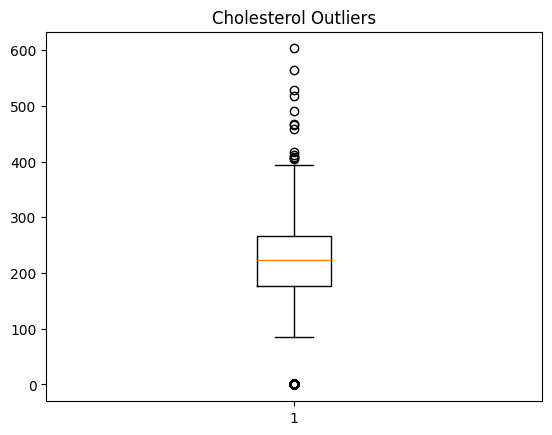

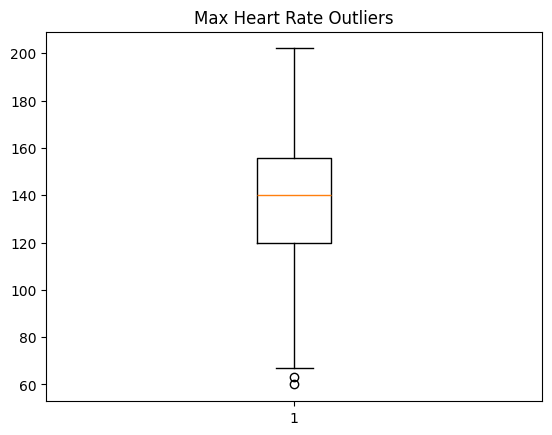

In [103]:
plt.boxplot(hdp['chol'])
plt.title("Cholesterol Outliers")
plt.show()

plt.boxplot(hdp['thalch'])
plt.title("Max Heart Rate Outliers")
plt.show()

in above two boxplots both have outliers. The cholestrol level on 0 and above 400 are outliers, and for the max heart rate the outliers are around 60. so let's try cleaning them.

In [104]:
hdp.count()

,0
age,918
sex,918
cp,918
trestbps,918
chol,918
fbs,918
restecg,918
thalch,918
exang,918
oldpeak,918


In [105]:
hdp = hdp[(hdp['chol'] != 0) & (hdp['chol'] <= 400)]

In [106]:
hdp.count()

,0
age,733
sex,733
cp,733
trestbps,733
chol,733
fbs,733
restecg,733
thalch,733
exang,733
oldpeak,733


## Training logistics model from that data

To train the model  
1: split vertical data to features and labels  
2: split horizontal data to test and train

In [107]:
from sklearn.model_selection import train_test_split

X = hdp.drop("num", axis=1)
y = hdp["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [108]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((586, 10), (147, 10), (586,), (147,))

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.5986394557823129
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        81
           1       0.42      0.42      0.42        40
           2       0.50      0.11      0.18         9
           3       0.12      0.08      0.10        13
           4       0.25      0.25      0.25         4

    accuracy                           0.60       147
   macro avg       0.41      0.34      0.35       147
weighted avg       0.57      0.60      0.57       147



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model accuracy

In [111]:
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5986394557823129


## Confusion matrix

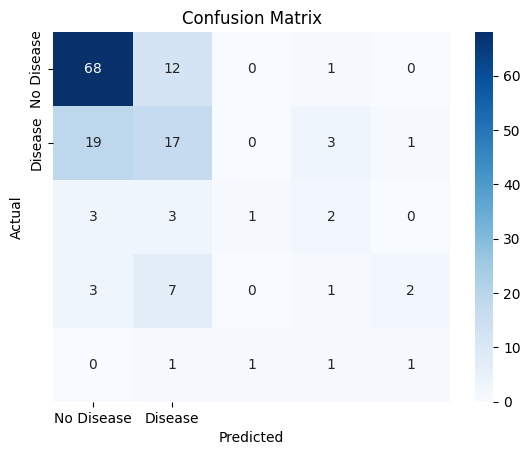

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model is most confused at no-disease

## ROC Curve

ROC curve works only with binary data, but our `Target` have {0, 1, 2, 3, 4} values. which 0 is for no-disease, and {1..4} is for disease with severity level. so to make it binary we will convert all {1..4} to 1 just to say it has disease, no need for severity level.

In [116]:
y_train = y_train.apply(lambda x: 1 if x > 0 else 0)
y_test  = y_test.apply(lambda x: 1 if x > 0 else 0)

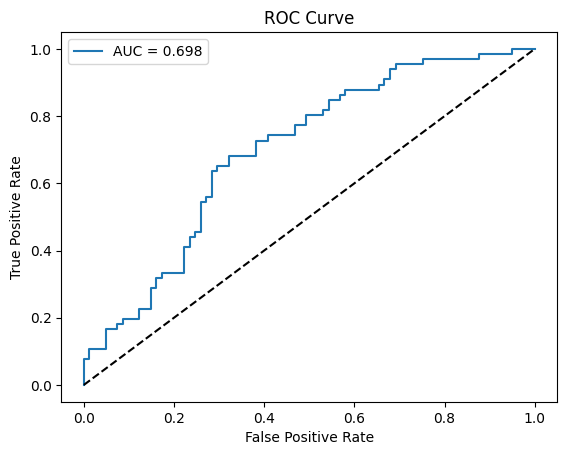

In [117]:
from sklearn.metrics import roc_curve, auc

y_prob = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()